In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Test Section

In [ ]:
import numpy as np
import random
import os
import cv2
import matplotlib.pyplot as plt

## Load Dishes

In [ ]:
class CV2Helper:
    def __init__(self):
        self.ws = '/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset'
        self.dataset_imagery_basedir = self.ws + '/imagery'
        self.dish_images_path = self.ws + '/realsense_overhead/'
        self.dish_ids = ["dish_1557862829", "dish_1556572657", "dish_1562097001", "dish_1557861697", "dish_1557936599"]
        self.dish_folder = "dish_1557862829"
        self.rgb = '/rgb.png'
        self.depth_raw = '/depth_raw.png'
        self.depth_color = '/depth_color.png'
        # output_dir = ws + "/cv2_out"
        self.output_dir = self.ws + "/cv2_out"


helper = CV2Helper()
dishes = []
for d in os.listdir(helper.dish_images_path):
    dishes.append(helper.dish_images_path + d + helper.rgb)

### main - Display random images in RGB

In [ ]:
def main(n=2):
  ind = random.randint(0,len(dishes))
  index = random.sample(list(np.arange(len(dishes))),n)
  print(index)
  g = 1
  c = 1
  plt.figure(figsize=(10,6))
  for i in index:
    img = cv2.imread(dishes[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(n,1,g)
    plt.imshow(img)
    # ,fontdict={"size":25}
    plt.title(dishes[0][-23:-8])
    g += 1


[826, 2358]


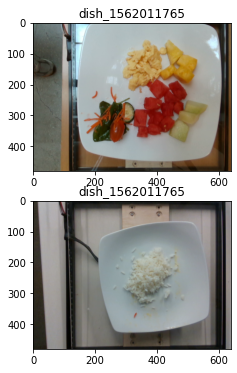

In [ ]:
main()

# print(dishes[0][-23:-8])

### Main - to mask some of the noise out of the loaded image using a predefined rectangular mask

In [ ]:
def main2(n=2):
  index = random.sample(list(np.arange(len(dishes))),n)
  g = 1
  c = 3
  plt.figure(figsize=(12,10))
  names = [dishes[n] for n in index]
  print(names)
  for i in index:
    image = cv2.imread(dishes[i])
    # print(image.shape)
    plt.subplot(n,c,g)
    plt.imshow(image)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    # mask = cv2.rectangle(mask, (0, 480), (180, 580), 255, -1)
    mask = cv2.rectangle(mask,(180, 30), (600, 480), 255, -1)
    g = g + 1
    plt.subplot(n,c,g)
    plt.imshow(mask)
    # apply our mask -- notice how only the person in the image is
    # cropped out
    masked = cv2.bitwise_or(image, image, mask=mask)
    g = g + 1
    plt.subplot(n,c,g)
    plt.imshow(masked)
    # img = cv2.imread(dishes[i])
    # plt.subplot(10,40,g)
    # plt.imshow(img)
    # plt.title(dishes[0][-23:-8],fontdict={"size":25})
    g += 1
  

['/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1563910530/rgb.png', '/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1561491154/rgb.png']


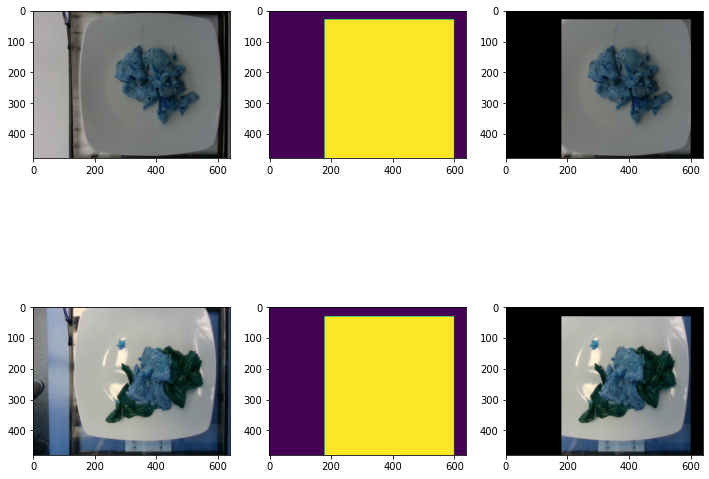

In [ ]:
main2()

(480, 640, 3)


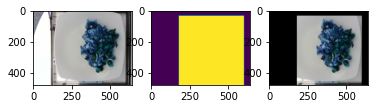

In [ ]:
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
image = cv2.imread(dishes[0])
print(image.shape)
plt.subplot(1,3,1)
plt.imshow(image)
mask = np.zeros(image.shape[:2], dtype="uint8")
# mask = cv2.rectangle(mask, (0, 480), (180, 580), 255, -1)
mask = cv2.rectangle(mask,(180, 30), (600, 480), 255, -1)

plt.subplot(1,3,2)
plt.imshow(mask)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_or(image, image, mask=mask)
plt.subplot(1,3,3)
plt.imshow(masked)


In [ ]:
p = dishes[10][:-7]
f_rgb = dishes[10]
print(f_rgb)
f_raw = p + "depth_raw.png"
f_raw_color = p + "depth_color.png"
rgb = cv2.imread(f_rgb,cv2.COLOR_BGR2RGB)
# rgb = cv2.cvtColor(rgb,cv2.COLOR_RGB2BGR)
raw = cv2.imread(f_raw,cv2.COLOR_BGR2GRAY)
raw_color = cv2.imread(f_raw_color,cv2.COLOR_BGR2RGB)


/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1558629517/rgb.png


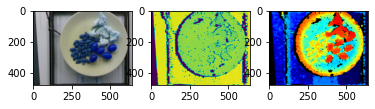

In [ ]:
plt.subplot(1,3,1)
plt.imshow(rgb)
plt.subplot(1,3,2)
plt.imshow(raw)
plt.subplot(1,3,3)
plt.imshow(raw_color)

In [ ]:
print(rgb.shape)
print(raw.shape)
print(raw_color.shape)

(480, 640, 3)
(480, 640)
(480, 640, 3)


In [ ]:
raw

array([[   0,    0,    0, ..., 4133, 4133, 4131],
       [   0,    0,    0, ..., 4134, 4133, 4133],
       [   0,    0,    0, ..., 4136, 4134, 4133],
       ...,
       [   0,    0,    0, ..., 4158, 4156, 4156],
       [   0,    0,    0, ..., 4154, 4154, 4151],
       [   0,    0,    0, ..., 4154, 4154, 4153]], dtype=uint16)

### Main - Random images loaded, converted to HSV  and mask using InRange with white

(480, 640, 3)


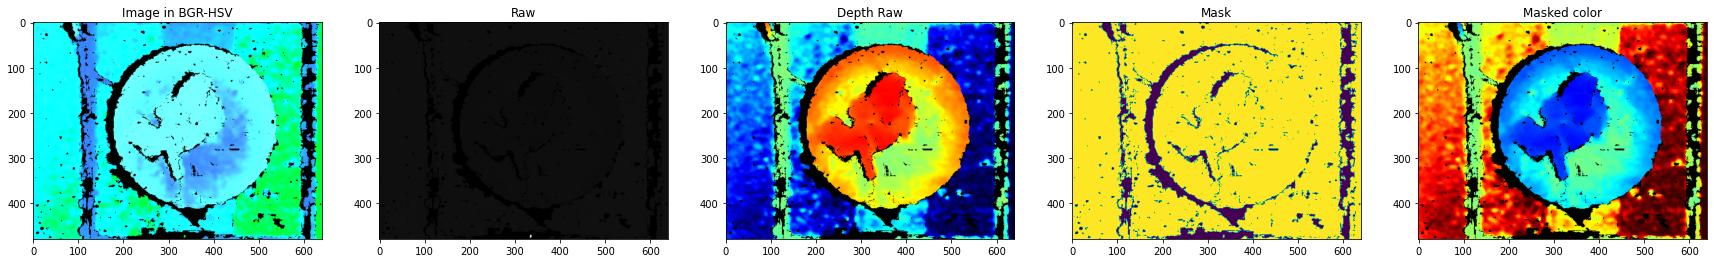

In [ ]:
def main3(n=2):
  index = random.sample(list(np.arange(len(dishes))),n)
  cnt = 1
  c = 5
  for i in index:
    p = dishes[i][:-7]
    r = p + "depth_raw.png"
    dc = p + "depth_color.png"
    img = cv2.imread(dishes[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    rimg = cv2.imread(r)
    img = cv2.cvtColor(rimg,cv2.COLOR_BGR2HSV)
    dcimg = cv2.imread(dc)
    img = cv2.cvtColor(dcimg,cv2.COLOR_BGR2HSV)
    # rimg = cv2.threshold(rimg,127,255,cv2.THRESH_BINARY)[1]
    # dcimg = cv2.threshold(dcimg,127,255,cv2.THRESH_BINARY)[1]
    mask = cv2.inRange(img, l, u)
    plt.subplot(n,c,cnt)
    plt.imshow(img)
    plt.title("Image in BGR-HSV")
    cnt += 1
    plt.subplot(n,c,cnt)
    plt.imshow(rimg)
    plt.title("Raw")
    cnt += 1
    plt.subplot(n,c,cnt)
    plt.imshow(dcimg)
    plt.title("Depth Raw")
    cnt += 1
    plt.subplot(n,c,cnt)
    plt.imshow(mask)
    plt.title("Mask")
    cnt += 1
    color = img.copy()
    color = cv2.cvtColor(color,cv2.COLOR_HSV2RGB)
    result = cv2.bitwise_and(color,color,mask=mask)
    plt.subplot(n,c,cnt)
    plt.imshow(color)
    plt.title("Masked color")
    cnt += 1
    print(result.shape)
    return dishes[i],result
    # print(result)
l = np.array([0, 42, 0])
u = np.array([180, 255, 255])
# l = np.array([0, 60, 0])
# u = np.array([190, 255, 255])
c = 6
plt.figure(figsize=(30,15))

rgb_path,result = main3(n=1)


In [ ]:

def remove_shadow(p_img):
  img = p_img.copy()
  rgb_planes = cv2.split(img)

  result_planes = []
  result_norm_planes = []
  for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((2,2), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

  result = cv2.merge(result_planes)
  result_norm = cv2.merge(result_norm_planes)
  return result,result_norm

def main4(n=2):
  index = random.sample(list(np.arange(len(dishes))),n)
  cnt = 1
  c = 3
  output = []
  for i in index:
    # Load image, grayscale, Otsu's threshold
    image = cv2.imread(dishes[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Remove background using bitwise-and operation
    result = cv2.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] # Turn background white
    color = result.copy()
    color = cv2.cvtColor(color,cv2.COLOR_BGR2RGB)
    plt.subplot(n,c,cnt)
    plt.imshow(image)
    cnt += 1
    plt.subplot(n,c,cnt)
    plt.imshow(thresh)
    cnt += 1
    plt.subplot(n,c,cnt)
    plt.imshow(color)
    cnt += 1
    output.append(color)
  return output

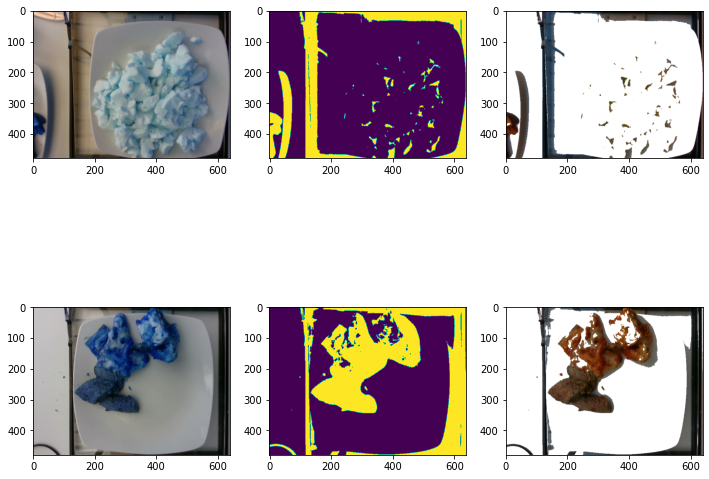

In [ ]:
plt.figure(figsize=(12,10))
result = main4()
out = remove_shadow(result[0])

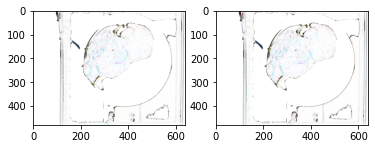

In [ ]:
plt.subplot(1,2,1)
plt.imshow(out[0])
plt.subplot(1,2,2)
plt.imshow(out[1])

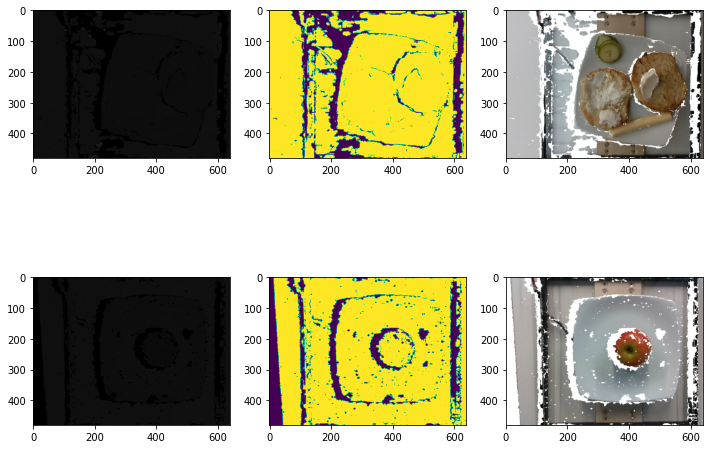

In [ ]:
def office_main(n=2):
  index = random.sample(list(np.arange(len(dishes))),n)
  cnt = 1
  for i in index:
    # Load image, grayscale, Otsu's threshold
    p = dishes[i][:-7]
    r = p + "depth_raw.png"
    dc = p + "depth_color.png"
    img = cv2.imread(dishes[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    raw_img = cv2.imread(r)
    raw_img1 = raw_img.copy()
    raw_img1 = cv2.cvtColor(raw_img1,cv2.COLOR_BGR2GRAY)
    raw_img1 = cv2.threshold(raw_img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    result = cv2.bitwise_and(img, img, mask=raw_img1)
    result[raw_img1==0] = [255,255,255] # Turn background white

    # print(raw_img.shape)
    # print(raw_img)
    plt.subplot(n,3,cnt)
    plt.imshow(raw_img)
    cnt += 1
    plt.subplot(n,3,cnt)
    plt.imshow(raw_img1)
    cnt += 1
    plt.subplot(n,3,cnt)
    plt.imshow(result)
    cnt += 1

plt.figure(figsize=(12,9))

office_main()

In [ ]:
x,y,z = np.nonzero(result)
print(x.min(),x.max())
print(y.min(),y.max())

30 479
180 600


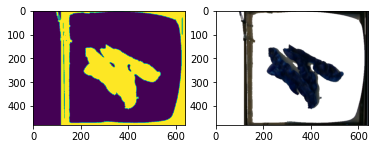

In [ ]:



# plt.imshow(image)

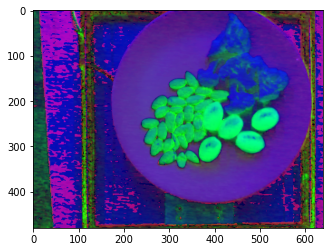

In [ ]:
# Python program to explain
# mask inversion on a b/w image.

# importing cv2 and numpy library
import cv2
import numpy as np

# Reading an image
img = cv2.imread(dishes[10])

# The kernel to be used for dilation purpose
kernel = np.ones((5, 5), np.uint8)

# converting the image to HSV format
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# # defining the lower and upper values of HSV,
# # this will detect yellow colour
Lower_hsv = np.array([20, 70, 100])
Upper_hsv = np.array([30, 255, 255])

# creating the mask by eroding,morphing,
# dilating process
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
Mask = cv2.erode(Mask, kernel, iterations=1)
Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
Mask = cv2.dilate(Mask, kernel, iterations=1)

# Inverting the mask by
# performing bitwise-not operation
Mask = cv2.bitwise_not(Mask)

# Displaying the image
plt.imshow(hsv)


82
[[0, 0.0], [1, 0.0], [2, 0.0], [3, 0.0], [4, 0.0], [5, 0.0], [6, 0.0], [7, 0.0], [8, 0.0], [9, 47.0], [10, 44.0], [11, 0.0], [12, 20.5], [13, 0.0], [14, 0.0], [15, 0.0], [16, 0.0], [17, 0.0], [18, 0.0], [19, 0.0], [20, 0.0], [21, 2557.5], [22, 0.0], [23, 35.0], [24, 7.5], [25, 105.0], [26, 74.0], [27, 0.0], [28, 168.5], [29, 0.0], [30, 0.0], [31, 0.0], [32, 0.0], [33, 15.5], [34, 0.0], [35, 0.0], [36, 0.0], [37, 45.0], [38, 235.0], [39, 1.5], [40, 38.0], [41, 0.0], [42, 0.0], [43, 12.5], [44, 0.0], [45, 0.0], [46, 4.5], [47, 0.0], [48, 0.0], [49, 0.0], [50, 0.0], [51, 0.0], [52, 3.0], [53, 1.0], [54, 0.0], [55, 0.0], [56, 0.0], [57, 0.0], [58, 1.0], [59, 0.0], [60, 0.0], [61, 28.0], [62, 0.0], [63, 0.5], [64, 0.0], [65, 0.0], [66, 0.0], [67, 0.0], [68, 0.5], [69, 0.0], [70, 0.5], [71, 14.5], [72, 0.0], [73, 0.0], [74, 6009.0], [75, 46.0], [76, 42.5], [77, 0.0], [78, 695.5], [79, 205502.5], [80, 156.0], [81, 55084.0]]
25
[[0, 0.0], [1, 0.0], [2, 0.5], [3, 0.0], [4, 0.0], [5, 0.0], [6

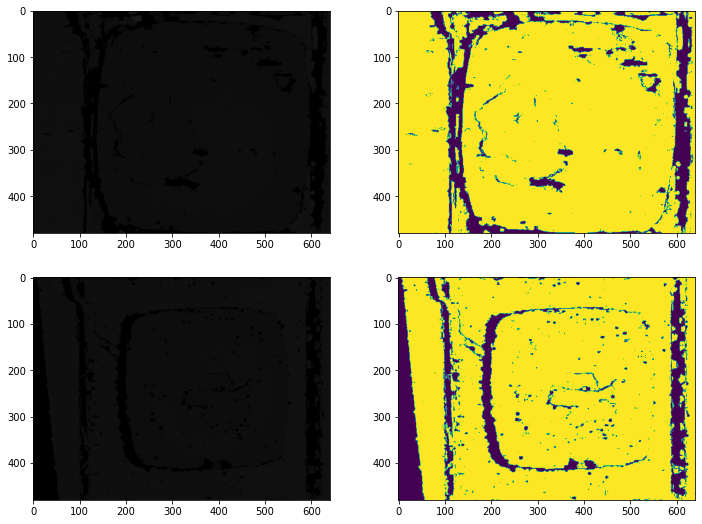

In [ ]:
def office_main2(n=2):
  index = random.sample(list(np.arange(len(dishes))),n)
  cnt = 1
  c = 2
  for i in index:
    # Load image, grayscale, Otsu's threshold
    p = dishes[i][:-7]
    r = p + "depth_raw.png"
    dc = p + "depth_color.png"
    img = cv2.imread(dishes[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    raw_img = cv2.imread(r)
    raw_img1 = raw_img.copy()
    raw_img1 = cv2.cvtColor(raw_img1,cv2.COLOR_BGR2GRAY)
    raw_img1 = cv2.threshold(raw_img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(raw_img1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    print(len(contours))
    area = [[i,cv2.contourArea(c)] for i,c in enumerate(contours)]
    print(area)
    
    raw_img1 = cv2.drawContours(raw_img1,contours,0,(255,255,255),5)
    plt.subplot(n,c,cnt)
    plt.imshow(raw_img)
    cnt += 1
    plt.subplot(n,c,cnt)
    plt.imshow(raw_img1)
    cnt += 1
    # plt.subplot(n,3,cnt)
    # plt.imshow(result)
    # cnt += 1

plt.figure(figsize=(12,9))

office_main2()

/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1567007783/rgb.png


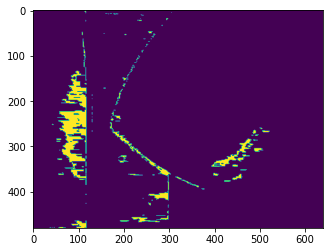

In [ ]:
# obj_path = dishes[0]
index = random.sample(list(np.arange(len(dishes))),5)
p = index[2]
obj_path = dishes[p]
# r = p + "depth_raw.png"
# obj_path = '/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1562011765/rgb.png'
print(obj_path)
img = cv2.imread(obj_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
Lower_hsv = np.array([40, 0, 120])
Upper_hsv = np.array([90, 255, 255])

# creating the mask by eroding,morphing,
# dilating process
mask = cv2.inRange(img, Lower_hsv, Upper_hsv)
img.shape
plt.imshow(mask)

In [ ]:
print(np.get_printoptions())
# np.set_printoptions(precision=3, suppress=True)
print(img.shape)
print(img[])

{'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': False}
(480, 640, 3)


## Finals

In [156]:
def crop_masked(img):
    # argwhere will give you the coordinates of every non-zero point
  true_points = np.argwhere(img)
  # take the smallest points and use them as the top left of your crop
  top_left = true_points.min(axis=0)
  # take the largest points and use them as the bottom right of your crop
  bottom_right = true_points.max(axis=0)
  out = img[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
            top_left[1]:bottom_right[1]+1]  # inclusive
  return out

def rect_mask(n=2):
  index = random.sample(list(np.arange(len(dishes))),n)
  g = 1
  c = 3
  plt.figure(figsize=(12,10))
  names = [dishes[n] for n in index]
  print(names)
  output = []
  for i in index:
    image = cv2.imread(dishes[i])
    # print(image.shape)
    plt.subplot(n,c,g)
    plt.imshow(image)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    # mask = cv2.rectangle(mask, (0, 480), (180, 580), 255, -1)
    mask = cv2.rectangle(mask,(180, 30), (600, 480), 255, -1)
    g = g + 1
    plt.subplot(n,c,g)
    plt.imshow(mask)
    # apply our mask -- notice how only the person in the image is
    # cropped out
    g = g + 1
    masked = cv2.bitwise_or(image, image, mask=mask)
    masked  = cv2.cvtColor(masked,cv2.COLOR_BGR2RGB)
    plt.subplot(n,c,g)
    plt.imshow(masked)
    g += 1
    output.append(masked)
  return output

def remove_blue_from_mask(hsv_image):
  # inputImage = tmp.copy()
  inputImage = hsv_image.copy()

  grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

  # Convert the BGR image to HSV:
  hsvImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2HSV)

  # Create the HSV range for the blue ink:
  # [128, 255, 255], [90, 50, 70]
  lowerValues = np.array([90, 50, 70])
  upperValues = np.array([128, 255, 255])

  # Get binary mask of the blue ink:
  bluepenMask = cv2.inRange(hsvImage, lowerValues, upperValues)
  # Use a little bit of morphology to clean the mask:
  # Set kernel (structuring element) size:
  kernelSize = 3
  # Set morph operation iterations:
  opIterations = 1
  # Get the structuring element:
  morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
  # Perform closing:
  bluepenMask = cv2.morphologyEx(bluepenMask, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

  # Add the white mask to the grayscale image:
  colorMask = cv2.add(grayscaleImage, bluepenMask)
  _, binaryImage = cv2.threshold(colorMask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # cv2.imwrite('bwimage.jpg',binaryImage)
  thresh, im_bw = cv2.threshold(binaryImage, 210, 230, cv2.THRESH_BINARY)
  kernel = np.ones((1, 1), np.uint8)
  imgfinal = cv2.dilate(im_bw, kernel=kernel, iterations=1)
  return imgfinal

['/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1558722398/rgb.png', '/content/drive/MyDrive/01_LJMU_UPGRAD/experiments/final-thesis-lab/workspace/dataset/realsense_overhead/dish_1562777068/rgb.png']


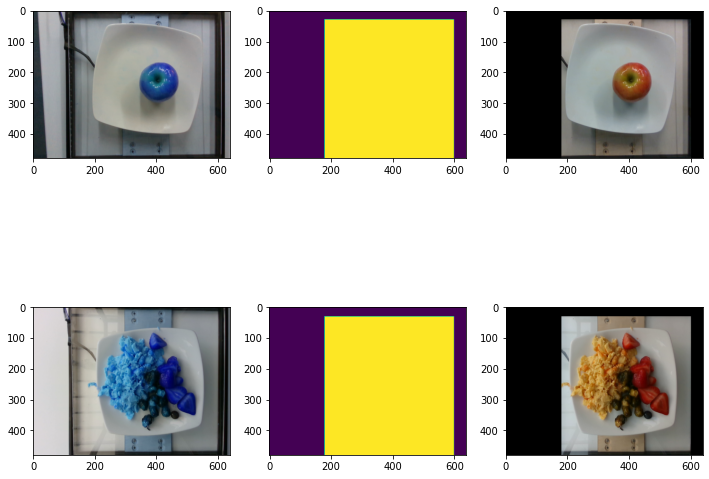

In [157]:
rgb_out = rect_mask()
cropped_out = [crop_masked(o) for o in rgb_out]
hsv = cropped_out[1].copy()
hsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2HSV)
imgfinal = remove_blue_from_mask(hsv)
copy_of = imgfinal.copy()
copy_of[copy_of > 0] = 255

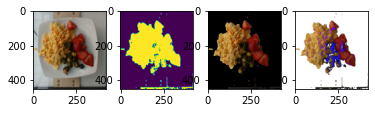

In [158]:
rgb = cropped_out[1].copy()
final_img = cv2.bitwise_and(rgb,rgb,mask=copy_of)
plt.subplot(1,4,1)
plt.imshow(rgb)
plt.subplot(1,4,2)
plt.imshow(copy_of)
plt.subplot(1,4,3)
plt.imshow(final_img)
final_1 = final_img.copy()
final_1[final_1 == 0] = 255
plt.subplot(1,4,4)
plt.imshow(final_1)

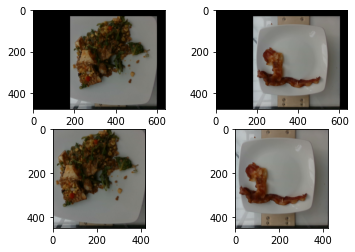

In [ ]:
plt.subplot(2,2,1)
plt.imshow(output[0])
plt.subplot(2,2,2)
plt.imshow(output[1])
plt.subplot(2,2,3)
plt.imshow(cropped_out[0])
plt.subplot(2,2,4)
plt.imshow(cropped_out[1])

(450, 421, 3)

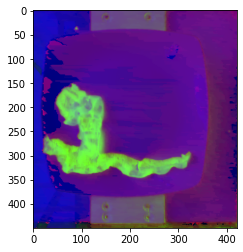

In [ ]:
tmp = cropped_out[1].copy()
tmp = cv2.cvtColor(tmp,cv2.COLOR_BGR2HSV)
plt.imshow(tmp)
tmp.shape

In [ ]:
hsv = tmp.copy()
# lower = np.array([20, 100, 100], dtype="uint8")
# higher = np.array([180, 100, 100], dtype="uint8")
# range_hsv = cv2.inRange(hsv, lower, higher);
# contours, _ = cv2.findContours(hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# area = [(i,cv2.contourArea(c)) for i,c in enumerate(contours)]   
# hsv[300,80]
# 40,   9, 177
# hsv[200,80]
# [111, 211,  64]

In [ ]:
green = np.uint8([[[0, 255, 0]]]) #here insert the bgr values which you want to convert to hsv
hsvGreen = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(hsvGreen)

lowerLimit = hsvGreen[0][0][0] - 10, 100, 100
upperLimit = hsvGreen[0][0][0] + 10, 255, 255

print(upperLimit)
print(lowerLimit)

[[[ 60 255 255]]]
(70, 255, 255)
(50, 100, 100)


# Interesting Code

### COLOR RANGE


```
color_dict_HSV = {'black': [[180, 255, 30], [0, 0, 0]],
              'white': [[180, 18, 255], [0, 0, 231]],
              'red1': [[180, 255, 255], [159, 50, 70]],
              'red2': [[9, 255, 255], [0, 50, 70]],
              'green': [[89, 255, 255], [36, 50, 70]],
              'blue': [[128, 255, 255], [90, 50, 70]],
              'yellow': [[35, 255, 255], [25, 50, 70]],
              'purple': [[158, 255, 255], [129, 50, 70]],
              'orange': [[24, 255, 255], [10, 50, 70]],
              'gray': [[180, 18, 230], [0, 0, 40]]}
```

https://stackoverflow.com/questions/36817133/identifying-the-range-of-a-color-in-hsv-using-opencv

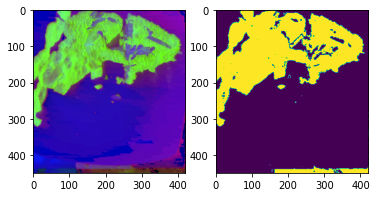

In [ ]:
imgfinal = remove_blue(hsv)
plt.subplot(1,2,1)
plt.imshow(hsv)
plt.subplot(1,2,2)
plt.imshow(imgfinal)


In [ ]:
copy_of = imgfinal.copy()
copy_of[copy_of > 0] = 255


255


In [ ]:
 contours, _ = cv2.findContours(raw_img1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    print(len(contours))
    area = [[i,cv2.contourArea(c)] for i,c in enumerate(contours)]
    print(area)
    
    raw_img1 = cv2.drawContours(raw_img1,contours,0,(255,255,255),5)

# Test

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def crop(img):
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(img)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = img[top_left[0]:bottom_right[0] + 1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1] + 1]  # inclusive
    return out


def rectangular_mask(dish_path,n=2):
    g = 1
    c = 3
    plt.figure(figsize=(12, 10))
    image_bgr = cv2.imread(dish_path)
    # print(image.shape)
    plt.subplot(n, c, g)
    plt.imshow(image_bgr)
    mask = np.zeros(image_bgr.shape[:2], dtype="uint8")
    # mask = cv2.rectangle(mask, (0, 480), (180, 580), 255, -1)
    mask = cv2.rectangle(mask, (180, 30), (600, 480), 255, -1)
    g = g + 1
    plt.subplot(n, c, g)
    plt.imshow(mask)
    # apply our mask -- notice how only the person in the image is
    # cropped out
    g = g + 1
    masked = cv2.bitwise_or(image_bgr, image_bgr, mask=mask)
    masked = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
    plt.subplot(n, c, g)
    plt.imshow(masked)
    g += 1
    return image_bgr,masked


def remove_blue(hsv_image):
    # input_image = tmp.copy()
    input_image = hsv_image.copy()

    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Convert the BGR image to HSV:
    hsv_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

    # Create the HSV range for the blue ink:
    # [128, 255, 255], [90, 50, 70]
    lower_values = np.array([90, 50, 70])
    upper_values = np.array([128, 255, 255])

    # Get binary mask of the blue ink:
    blue_mask = cv2.inRange(hsv_image, lower_values, upper_values)
    # Use a little bit of morphology to clean the mask:
    # Set kernel (structuring element) size:
    kernel_size = 3
    # Set morph operation iterations:
    op_iterations = 1
    # Get the structuring element:
    morph_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    # Perform closing:
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, morph_kernel, None, None, op_iterations,
                                   cv2.BORDER_REFLECT101)

    # Add the white mask to the grayscale image:
    color_mask = cv2.add(grayscale_image, blue_mask)
    _, binary_image = cv2.threshold(color_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # cv2.imwrite('bwimage.jpg',binary_image)
    thresh, im_bw = cv2.threshold(binary_image, 210, 230, cv2.THRESH_BINARY)
    kernel = np.ones((1, 1), np.uint8)
    image_final = cv2.dilate(im_bw, kernel=kernel, iterations=1)
    return image_final

def test(n=2,crop_only=False):
  index = random.sample(list(np.arange(len(dishes))),n)
  img_paths = [dishes[i] for i in index]
  out = []
  for i,path in enumerate(img_paths):
    orig_bgr,masked = rectangular_mask(path,n)
    cropped_out = crop(masked)
    if not crop_only : 
        rgb = cropped_out.copy()
        hsv = cv2.cvtColor(cropped_out, cv2.COLOR_BGR2HSV)
        imgfinal = remove_blue(hsv)
        copy_of = imgfinal.copy()
        # copy_of[copy_of > 0] = 255
        final_img = cv2.bitwise_and(rgb,rgb,mask=copy_of)
        out.append([orig_bgr,final_img])
    out.append([orig_bgr,cropped_out])
  return out

2 1


ValueError: ignored

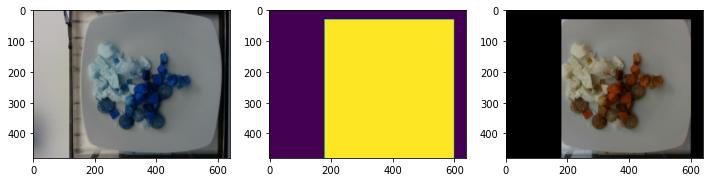

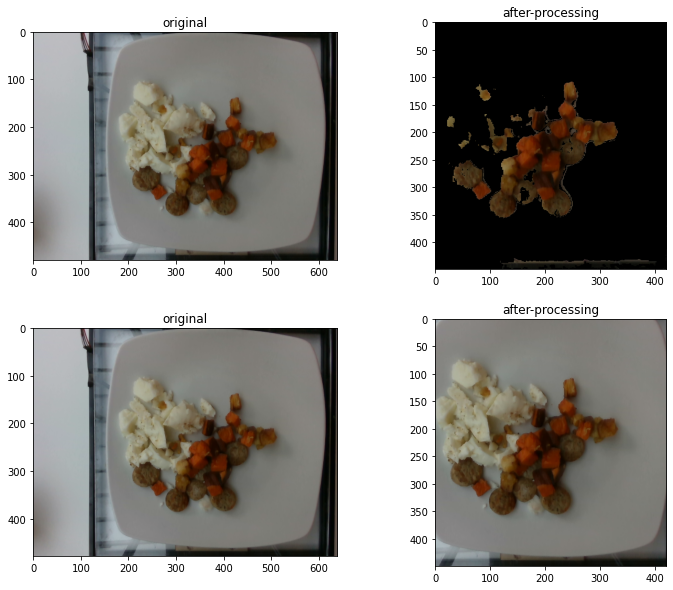

In [177]:
n = 2
grid = 1
result = test(n)
print(n,grid)
for i,lst in enumerate(result):
  img = cv2.cvtColor(lst[0],cv2.COLOR_BGR2RGB)
  plt.subplot(n,2,grid)
  plt.imshow(img) 
  plt.title("original")
  grid += 1
  plt.subplot(n,2,grid)
  plt.imshow(lst[1])
  plt.title("after-processing")
  grid += 1
